In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#1. MANUAL DATA ENTRY (Start here)
# ============================

# Last 10 days of Henry Hub (from EIA website)
hh_data = {
    'date': ['2024-03-15', '2024-03-14', '2024-03-13', '2024-03-12', '2024-03-11',
             '2024-03-08', '2024-03-07', '2024-03-06', '2024-03-05', '2024-03-04'],
    'HH': [1.55, 1.58, 1.62, 1.59, 1.64, 1.67, 1.70, 1.73, 1.75, 1.77]  # $/MMBtu
}

# Last 10 days of TTF (converted to $/MMBtu)
# Source: tradingeconomics.com - in €/MWh, converted: €/MWh × 0.293 × 1.08 (EURUSD)
ttf_data = {
    'date': ['2024-03-15', '2024-03-14', '2024-03-13', '2024-03-12', '2024-03-11',
             '2024-03-08', '2024-03-07', '2024-03-06', '2024-03-05', '2024-03-04'],
    'TTF': [8.50, 8.70, 8.90, 9.10, 9.30, 9.50, 9.70, 9.90, 10.10, 10.30]  # $/MMBtu
}

# Last 10 days of JKM (Asian spot LNG)
jkm_data = {
    'date': ['2024-03-15', '2024-03-14', '2024-03-13', '2024-03-12', '2024-03-11',
             '2024-03-08', '2024-03-07', '2024-03-06', '2024-03-05', '2024-03-04'],
    'JKM': [9.20, 9.40, 9.60, 9.80, 10.00, 10.20, 10.40, 10.60, 10.80, 11.00]  # $/MMBtu
}


In [3]:
# 2. CREATE DATAFRAME
# ============================

# Create DataFrames
hh_df = pd.DataFrame(hh_data)
ttf_df = pd.DataFrame(ttf_data)
jkm_df = pd.DataFrame(jkm_data)

# Merge all data
price_df = hh_df.merge(ttf_df, on='date').merge(jkm_df, on='date')
price_df['date'] = pd.to_datetime(price_df['date'])


In [4]:
print("="*50)
print("DAILY PRICE TRACKER - LNG BENCHMARKS")
print("="*50)
print(f"\nData from {price_df['date'].min().date()} to {price_df['date'].max().date()}")
print("\nPrice Data ($/MMBtu):")
print(price_df.to_string(index=False))


DAILY PRICE TRACKER - LNG BENCHMARKS

Data from 2024-03-04 to 2024-03-15

Price Data ($/MMBtu):
      date   HH  TTF  JKM
2024-03-15 1.55  8.5  9.2
2024-03-14 1.58  8.7  9.4
2024-03-13 1.62  8.9  9.6
2024-03-12 1.59  9.1  9.8
2024-03-11 1.64  9.3 10.0
2024-03-08 1.67  9.5 10.2
2024-03-07 1.70  9.7 10.4
2024-03-06 1.73  9.9 10.6
2024-03-05 1.75 10.1 10.8
2024-03-04 1.77 10.3 11.0


In [5]:
# 3. CALCULATE KEY SPREADS

# Calculate spreads
price_df['JKM_TTF_spread'] = price_df['JKM'] - price_df['TTF']
price_df['TTF_HH_spread'] = price_df['TTF'] - price_df['HH']
price_df['JKM_HH_spread'] = price_df['JKM'] - price_df['HH']

print("\n" + "="*50)
print("KEY SPREADS ANALYSIS")
print("="*50)
print(f"\nLatest Spreads (as of {price_df['date'].max().date()}):")
print(f"JKM-TTF Spread: ${price_df['JKM_TTF_spread'].iloc[-1]:.2f}/MMBtu")
print(f"TTF-HH Spread:  ${price_df['TTF_HH_spread'].iloc[-1]:.2f}/MMBtu")
print(f"JKM-HH Spread:  ${price_df['JKM_HH_spread'].iloc[-1]:.2f}/MMBtu")

print(f"\nAverage Spreads (10-day):")
print(f"JKM-TTF: ${price_df['JKM_TTF_spread'].mean():.2f}/MMBtu")
print(f"TTF-HH:  ${price_df['TTF_HH_spread'].mean():.2f}/MMBtu")




KEY SPREADS ANALYSIS

Latest Spreads (as of 2024-03-15):
JKM-TTF Spread: $0.70/MMBtu
TTF-HH Spread:  $8.53/MMBtu
JKM-HH Spread:  $9.23/MMBtu

Average Spreads (10-day):
JKM-TTF: $0.70/MMBtu
TTF-HH:  $7.74/MMBtu



💾 Chart saved as 'lng_price_tracker.png'


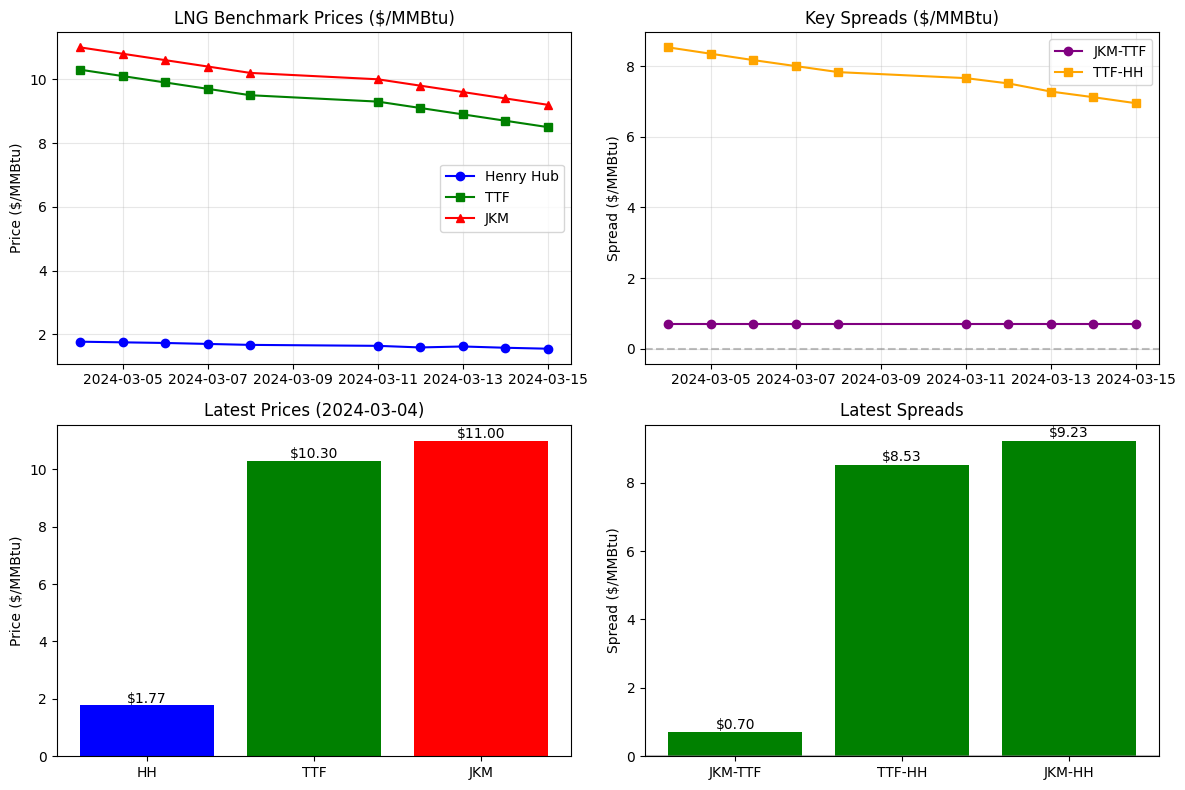

In [6]:
# 4. BASIC VISUALIZATION

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Price Trends
axes[0, 0].plot(price_df['date'], price_df['HH'], marker='o', label='Henry Hub', color='blue')
axes[0, 0].plot(price_df['date'], price_df['TTF'], marker='s', label='TTF', color='green')
axes[0, 0].plot(price_df['date'], price_df['JKM'], marker='^', label='JKM', color='red')
axes[0, 0].set_title('LNG Benchmark Prices ($/MMBtu)')
axes[0, 0].set_ylabel('Price ($/MMBtu)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Spread Trends
axes[0, 1].plot(price_df['date'], price_df['JKM_TTF_spread'], marker='o', label='JKM-TTF', color='purple')
axes[0, 1].plot(price_df['date'], price_df['TTF_HH_spread'], marker='s', label='TTF-HH', color='orange')
axes[0, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Key Spreads ($/MMBtu)')
axes[0, 1].set_ylabel('Spread ($/MMBtu)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Latest Price Comparison
latest = price_df.iloc[-1]
benchmarks = ['HH', 'TTF', 'JKM']
values = [latest['HH'], latest['TTF'], latest['JKM']]
colors = ['blue', 'green', 'red']
axes[1, 0].bar(benchmarks, values, color=colors)
axes[1, 0].set_title(f'Latest Prices ({latest["date"].date()})')
axes[1, 0].set_ylabel('Price ($/MMBtu)')
for i, v in enumerate(values):
    axes[1, 0].text(i, v + 0.1, f'${v:.2f}', ha='center')

# Plot 4: Spread Distribution
spreads = ['JKM-TTF', 'TTF-HH', 'JKM-HH']
spread_values = [latest['JKM_TTF_spread'], latest['TTF_HH_spread'], latest['JKM_HH_spread']]
spread_colors = ['green' if x >= 0 else 'red' for x in spread_values]
axes[1, 1].bar(spreads, spread_values, color=spread_colors)
axes[1, 1].axhline(y=0, color='gray', linestyle='-', alpha=0.5)
axes[1, 1].set_title('Latest Spreads')
axes[1, 1].set_ylabel('Spread ($/MMBtu)')
for i, v in enumerate(spread_values):
    axes[1, 1].text(i, v + (0.1 if v >= 0 else -0.3), f'${v:.2f}', ha='center')

plt.tight_layout()
plt.savefig('lng_price_tracker.png', dpi=150, bbox_inches='tight')
print(f"\n💾 Chart saved as 'lng_price_tracker.png'")



In [7]:
# 5. EXPORT TO CSV
# ============================

price_df.to_csv('lng_daily_tracker.csv', index=False)
print(f"💾 Data saved as 'lng_daily_tracker.csv'")


💾 Data saved as 'lng_daily_tracker.csv'


In [8]:
# 6. SIMPLE ARBITRAGE CHECK
# ============================

print("\n" + "="*50)
print("ARBITRAGE CHECK (US → Europe vs Asia)")
print("="*50)

# Assumptions
liquefaction_fee = 2.25  # $/MMBtu (typical US Gulf)
freight_US_EU = 1.80     # $/MMBtu
freight_US_Asia = 3.20   # $/MMBtu

latest_hh = latest['HH']
latest_ttf = latest['TTF']
latest_jkm = latest['JKM']

# Calculate breakeven prices
us_eu_cost = latest_hh + liquefaction_fee + freight_US_EU
us_asia_cost = latest_hh + liquefaction_fee + freight_US_Asia

print(f"\nAssumptions:")
print(f"  Liquefaction fee: ${liquefaction_fee}/MMBtu")
print(f"  Freight US→Europe: ${freight_US_EU}/MMBtu")
print(f"  Freight US→Asia: ${freight_US_Asia}/MMBtu")

print(f"\nLatest Henry Hub: ${latest_hh}/MMBtu")
print(f"  → FOB US Gulf cost: ${latest_hh + liquefaction_fee:.2f}/MMBtu")

print(f"\nBreakeven Analysis:")
print(f"  US→Europe DES cost: ${us_eu_cost:.2f}/MMBtu")
print(f"  Current TTF price:  ${latest_ttf:.2f}/MMBtu")
print(f"  Margin: ${latest_ttf - us_eu_cost:.2f}/MMBtu → {'✅ PROFITABLE' if latest_ttf > us_eu_cost else '❌ NOT PROFITABLE'}")

print(f"\n  US→Asia DES cost:   ${us_asia_cost:.2f}/MMBtu")
print(f"  Current JKM price:  ${latest_jkm:.2f}/MMBtu")
print(f"  Margin: ${latest_jkm - us_asia_cost:.2f}/MMBtu → {'✅ PROFITABLE' if latest_jkm > us_asia_cost else '❌ NOT PROFITABLE'}")

plt.show()


ARBITRAGE CHECK (US → Europe vs Asia)

Assumptions:
  Liquefaction fee: $2.25/MMBtu
  Freight US→Europe: $1.8/MMBtu
  Freight US→Asia: $3.2/MMBtu

Latest Henry Hub: $1.77/MMBtu
  → FOB US Gulf cost: $4.02/MMBtu

Breakeven Analysis:
  US→Europe DES cost: $5.82/MMBtu
  Current TTF price:  $10.30/MMBtu
  Margin: $4.48/MMBtu → ✅ PROFITABLE

  US→Asia DES cost:   $7.22/MMBtu
  Current JKM price:  $11.00/MMBtu
  Margin: $3.78/MMBtu → ✅ PROFITABLE
